✅ CHILI-3K dataset loaded successfully!
✅ Toxicology dataset loaded successfully!
🔹 CHILI-3K Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3180 non-null   object
dtypes: object(1)
memory usage: 25.0+ KB
None 

        0
0  13.74Å
1  24.09Å
2  33.76Å
3  44.48Å
4  54.12Å 

🔹 Toxicity prediction Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NPs         881 non-null    object 
 1   coresize    881 non-null    float64
 2   hydrosize   881 non-null    float64
 3   surfcharge  881 non-null    float64
 4   surfarea    881 non-null    float64
 5   Ec          881 non-null    float64
 6   Expotime    881 non-null    int64  
 7   dosage      881 non-null    float64
 8   e           881 non-nul

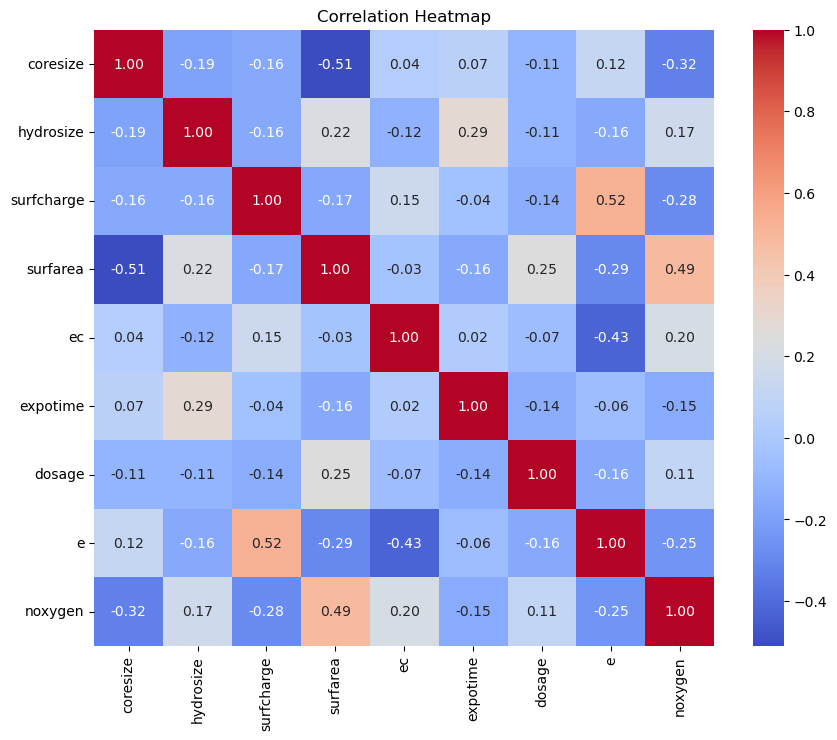

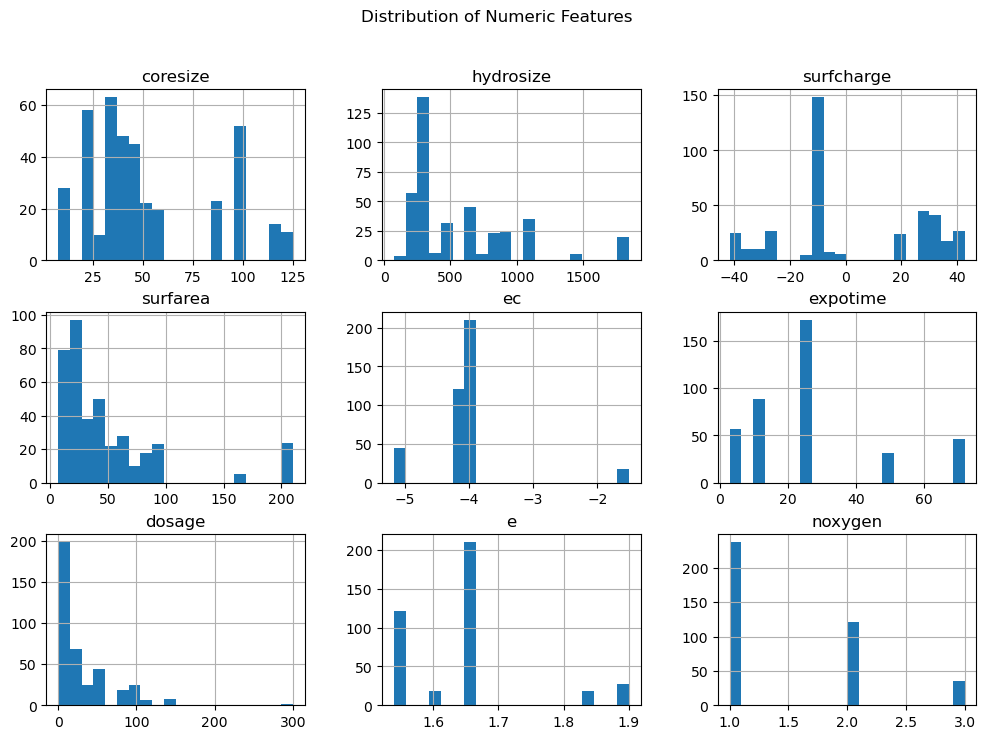

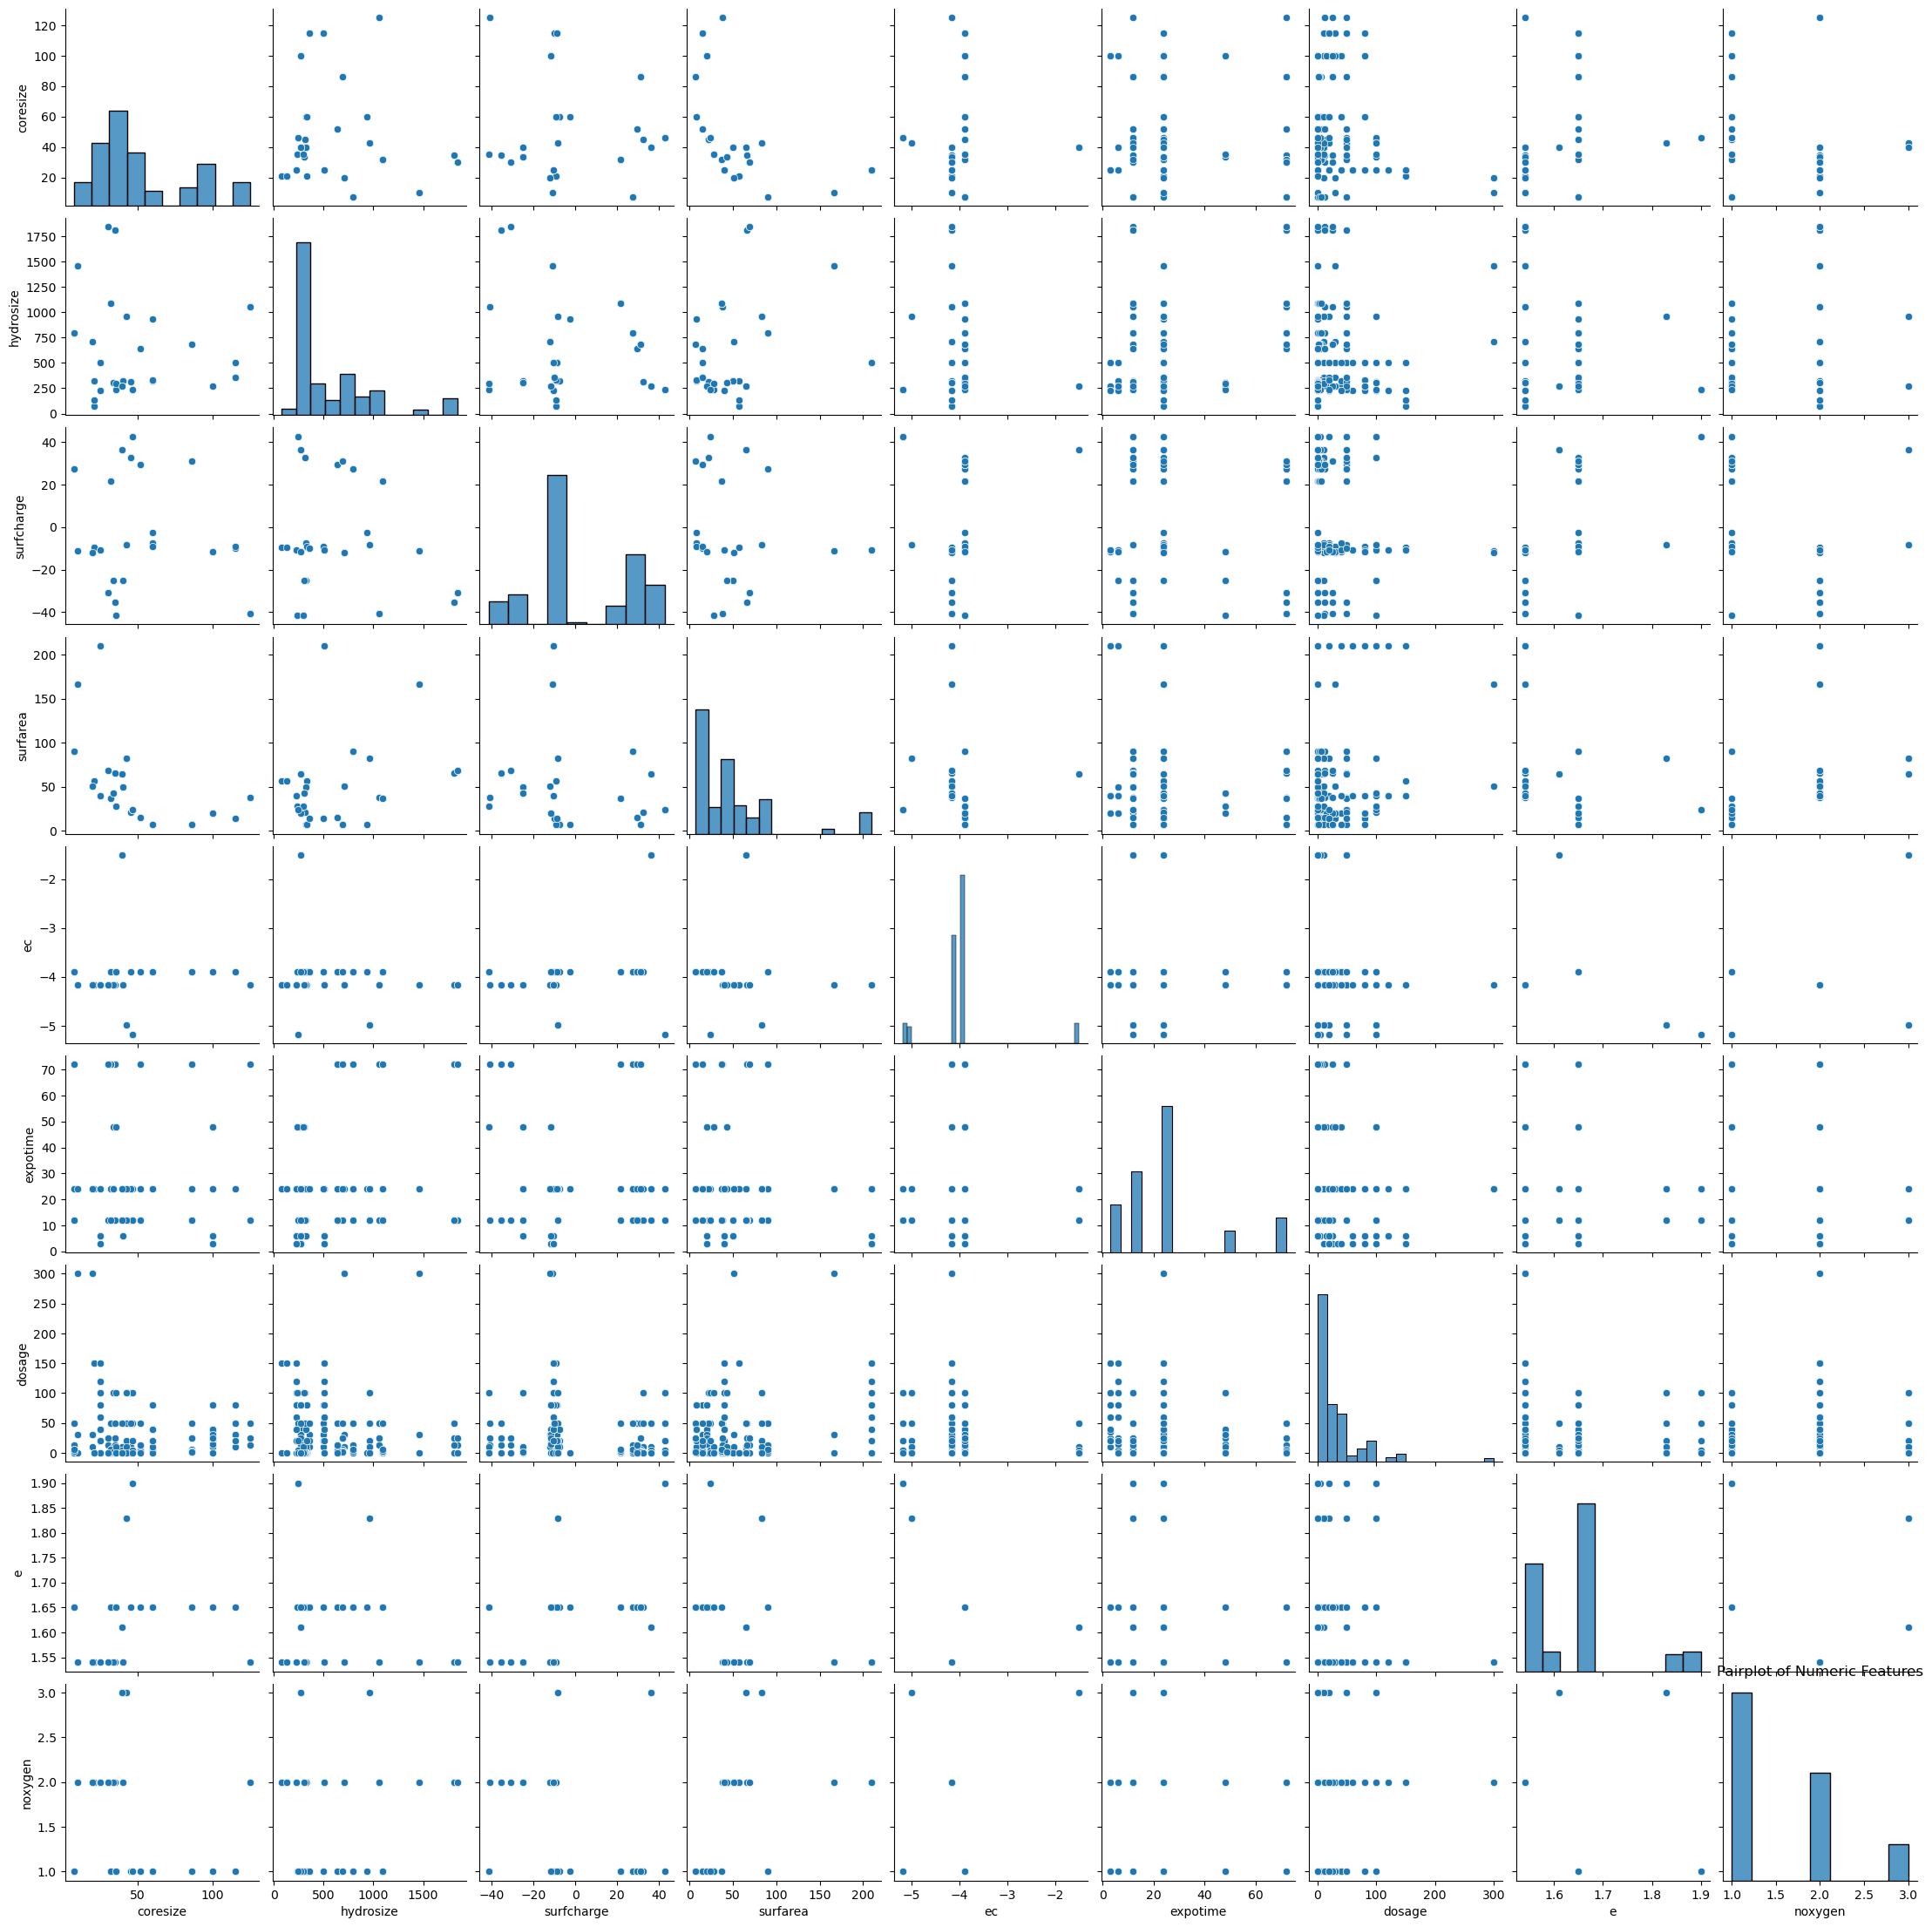

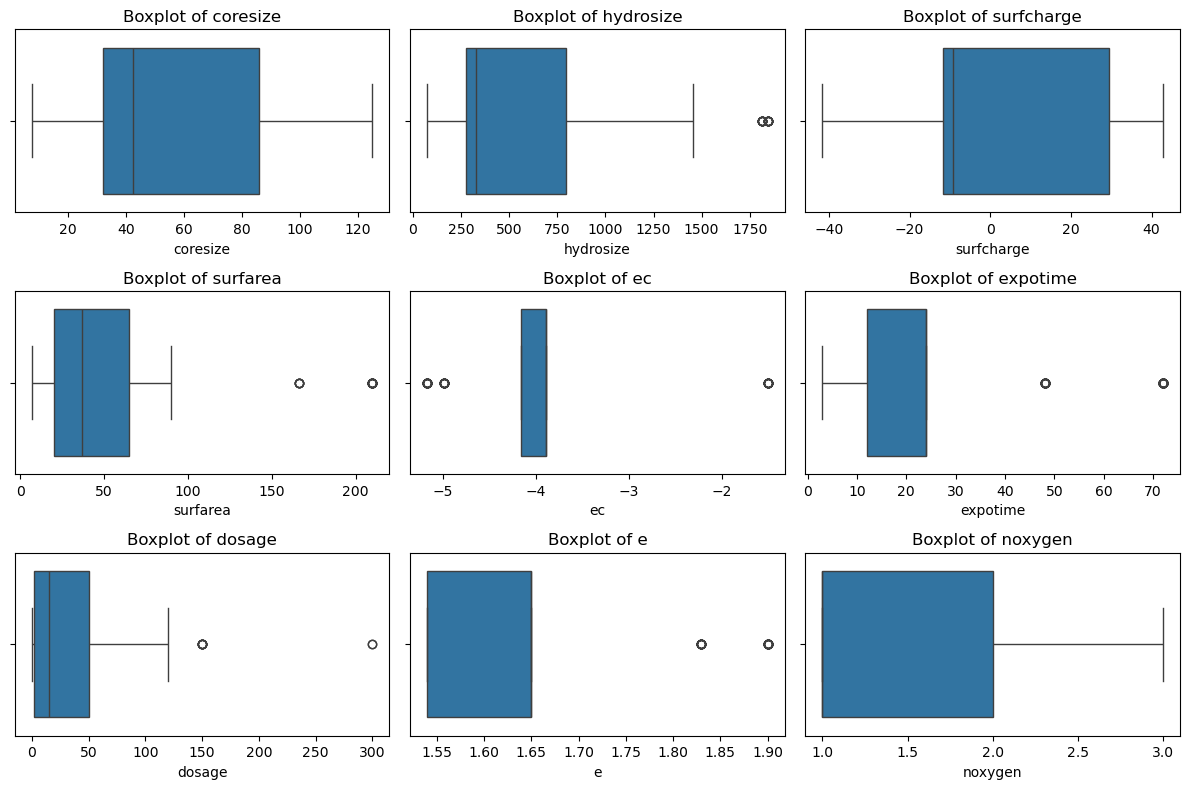

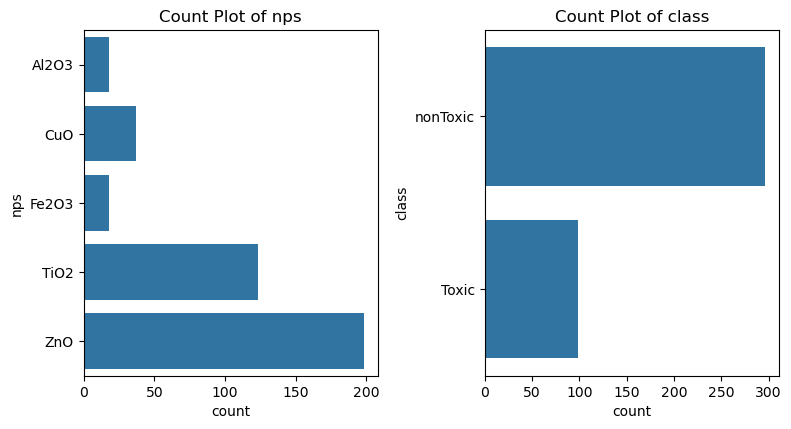

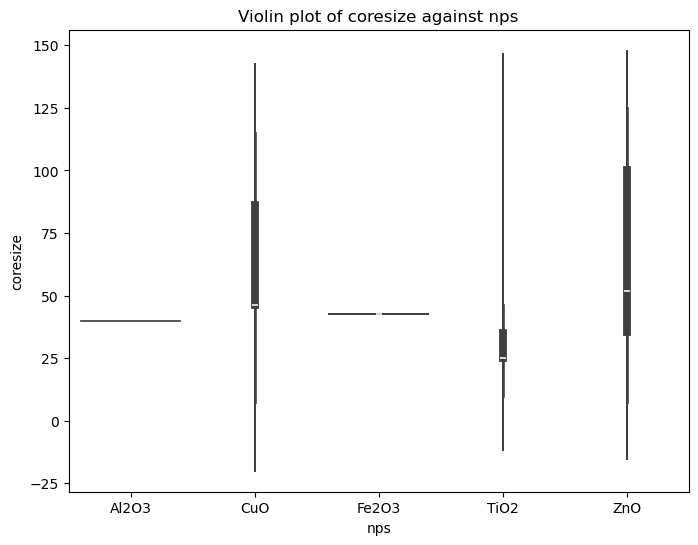

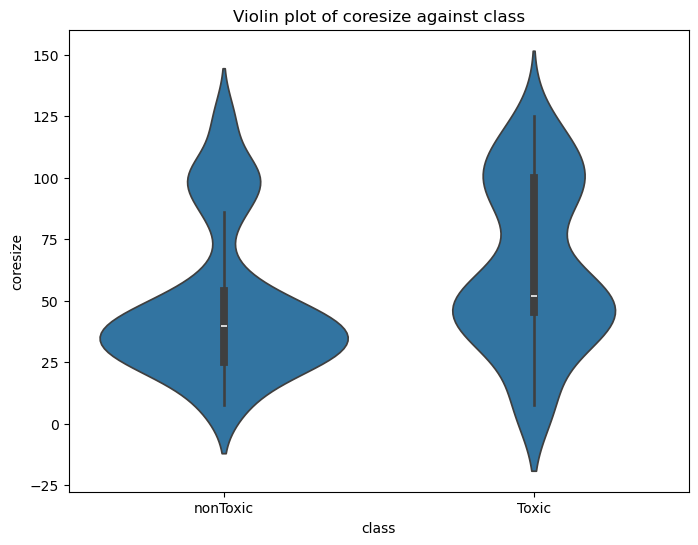

✅ Feature Engineering Completed!


In [1]:
import glob

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# ✅ Step 1: Define dataset folders
chili3k_folder = r"C:\Users\Swarna Lekhya\PycharmProjects\PythonProject\Chili 3K dataset\*.csv"  # All CHILI-3K CSVs
toxicity_folder = r"C:\Users\Swarna Lekhya\PycharmProjects\PythonProject\toxicity prediction dataset\*.csv"  # All Toxicology CSVs

# ✅ Step 2: Read all CHILI-3K CSV files using glob
chili3k_files = glob.glob(chili3k_folder)  # Get all CHILI-3K CSVs
chili3k_df = [pd.read_csv(file) for file in chili3k_files]  # Read each file into a DataFrame

# Combine all CHILI-3K data into one DataFrame
if chili3k_df:
    chili3k_dfs = pd.concat(chili3k_df, ignore_index=True)
    print("✅ CHILI-3K dataset loaded successfully!")
else:
    print("⚠️ No CSV files found in CHILI-3K dataset folder!")
    exit()  # Stop execution if no files found


# ✅ Step 3: Read all Toxicology CSV files using glob
toxicity_files = glob.glob(toxicity_folder)  # Get all Toxicology CSVs
nano_dfs = [pd.read_csv(file) for file in toxicity_files]  # Read each file into a DataFrame

# Combine all Toxicology data into one DataFrame
if nano_dfs:
    nano_df = pd.concat(nano_dfs, ignore_index=True)
    print("✅ Toxicology dataset loaded successfully!")
else:
    print("⚠️ No CSV files found in Toxicology dataset folder!")
    exit()

# Print basic info
print("🔹 CHILI-3K Dataset:")
print(chili3k_dfs.info(), "\n")
print(chili3k_dfs.head(), "\n")

print("🔹 Toxicity prediction Dataset:")
print(nano_df.info(), "\n")
print(nano_df.head(), "\n")

#data cleaning
# ✅ Step 4: Data Cleaning

# 1️⃣ Remove duplicates
chili3k_dfs.drop_duplicates(inplace=True)
nano_df.drop_duplicates(inplace=True)

# 2️⃣ Fill missing values
# Fill missing values
chili3k_dfs = chili3k_dfs.fillna(0)  # ✅ Assign the modified DataFrame
# ✅ Fill missing values
# Fill numeric columns with their mean
numeric_cols = nano_df.select_dtypes(include=["number"]).columns  # Numeric columns in nano_df
nano_df[numeric_cols] = nano_df[numeric_cols].fillna(nano_df[numeric_cols].mean())

# Fill categorical columns with the most frequent value
categorical_cols = nano_df.select_dtypes(include=["object"]).columns  # Categorical columns in nano_df
nano_df[categorical_cols] = nano_df[categorical_cols].fillna(nano_df[categorical_cols].mode().iloc[0])

# Replace NaNs with 0 (for numerical columns)

# Fill missing values in Toxicology dataset with column mean
for col in nano_df.select_dtypes(include=['float64', 'int64']).columns:
    nano_df[col] = nano_df[col].fillna(nano_df[col].mean())

# 3️⃣ Convert data types if needed
# Example: Convert an ID column to string
# chili3k_dfs["ID"] = chili3k_dfs["ID"].astype(str)

# 4️⃣ Standardize column names (optional)
chili3k_dfs.columns = chili3k_dfs.columns.str.lower().str.replace(" ", "_")
nano_df.columns = nano_df.columns.str.lower().str.replace(" ", "_")

# ✅ Step 5: Print cleaned data info
print("🔹 Cleaned CHILI-3K Dataset:")
print(chili3k_dfs.info(), "\n")
print(chili3k_dfs.head(), "\n")

print("🔹 Cleaned Toxicity Prediction Dataset:")
print(nano_df.info(), "\n")
print(nano_df.head(), "\n")

print("🎯 Data Cleaning Completed Successfully!")

# ✅ Step 6: Identify common columns for merging
common_columns = set(chili3k_dfs.columns) & set(nano_df.columns)  # Find common columns

if not common_columns:
    print("⚠️ No common columns found! Datasets will be analyzed separately.")
    merged_df = None
else:
    common_column = list(common_columns)[0]  # Choose one common column (modify if needed)
    print(f"✅ Merging datasets on column: {common_column}")

    # Merge datasets on the common column (Inner join ensures only matching records)
    merged_df = pd.merge(chili3k_dfs, nano_df, on=common_column, how="inner")

    # Print merged dataset info
    print("🔹 Merged Dataset Info:")
    print(merged_df.info(), "\n")
    print(merged_df.head(), "\n")

print("🎯 Dataset Merging Completed Successfully!")

###exploratory data analysis

# Summary Statistics
print("\nSummary Statistics:")
print(nano_df.describe())

# Check for data types
print("\nData Types:")
print(nano_df.dtypes)

# Check for missing values again (if any)
print("\nMissing Values:")
print(nano_df.isnull().sum())

# Remove non-numeric columns before calculating correlation
# Only keep numeric columns for the correlation matrix
numeric_df = nano_df.select_dtypes(include=["number"])

# Correlation heatmap for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

# Distribution of numeric columns (Histograms)
numeric_cols = numeric_df.columns  # Get numeric columns from the DataFrame
numeric_df[numeric_cols].hist(bins=20, figsize=(12, 8))  # Specify the data to plot
plt.suptitle('Distribution of Numeric Features')
plt.show()

# Pairplot for a subset of numeric columns (optional for smaller datasets)
sns.pairplot(numeric_df.sample(200))  # Sample if data is large
plt.title('Pairplot of Numeric Features')
plt.show()

# Get the numeric columns
numeric_cols = nano_df.select_dtypes(include=["number"]).columns

# Determine the number of subplots needed
num_subplots = len(numeric_cols)

# Dynamically calculate the number of rows and columns for the subplot grid
ncols = 3  # Number of columns
nrows = (num_subplots // ncols) + (num_subplots % ncols > 0)  # Number of rows based on the number of columns

# Create subplots
plt.figure(figsize=(12, 8))

# Create subplots for each numeric column
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(nrows, ncols, i)  # Adjust the number of subplots dynamically
    sns.boxplot(x=nano_df[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

# Count plot for categorical columns
categorical_cols = nano_df.select_dtypes(include=["object"]).columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)  # Adjust based on number of categorical columns
    sns.countplot(y=nano_df[col])
    plt.title(f'Count Plot of {col}')
plt.tight_layout()
plt.show()

# Violin plots to see distribution of numeric features against categorical ones (if applicable)
# Ensure numeric_cols and categorical_cols are not empty
if not numeric_cols.empty and not categorical_cols.empty:
    for col in categorical_cols:
        if len(nano_df[col].unique()) < 10:  # Ensures categories are manageable
            if numeric_cols[0] in nano_df.columns and col in nano_df.columns:  # Validate column existence
                plt.figure(figsize=(8, 6))
                sns.violinplot(x=nano_df[col], y=nano_df[numeric_cols[0]], data=nano_df)
                plt.title(f'Violin plot of {numeric_cols[0]} against {col}')
                plt.show()
            else:
                print(f"⚠️ Skipping plot: {numeric_cols[0]} or {col} not found in nano_df.")
else:
    print("⚠️ Skipping violin plots: No valid numeric or categorical columns found.")


# Correlation between categorical variables and the target (if any)
# If you have a target variable, for example 'target'
if 'target' in nano_df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='target', y=nano_df[numeric_cols[0]])  # Replace with your target column
    plt.title(f'Boxplot of {numeric_cols[0]} against target')
    plt.show()

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    nano_df[col] = le.fit_transform(nano_df[col])
    label_encoders[col] = le  # Save encoders for future use

import pandas as pd

# Example data
data = {
    'Name': ['A', 'B', 'C'],
    'Value': [10, 20, 30]
}
df = pd.DataFrame(data)

# Scale numerical features
scaler = StandardScaler()
nano_df[numeric_cols] = scaler.fit_transform(nano_df[numeric_cols])

print("✅ Feature Engineering Completed!")

#Machine learning


In [19]:
# Use KMeans to generate pseudo-labels
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
nano_df['target'] = kmeans.fit_predict(nano_df[numeric_cols])

print("✅ Synthetic target column 'target' created using KMeans.")

✅ Synthetic target column 'target' created using KMeans.


C:\Users\Swarna Lekhya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [18]:
# Example: Rename existing label column to target
nano_df.rename(columns={'toxicity_level': 'target'}, inplace=True)


In [20]:
print("Columns in dataset:")
print(nano_df.columns)

print("\nUnique values (if any) in possible label columns:")
for col in nano_df.select_dtypes(include=['object', 'category']).columns:
    print(f"{col}: {nano_df[col].unique()}")

Columns in dataset:
Index(['nps', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'ec',
       'expotime', 'dosage', 'e', 'noxygen', 'class', 'cluster', 'target'],
      dtype='object')

Unique values (if any) in possible label columns:


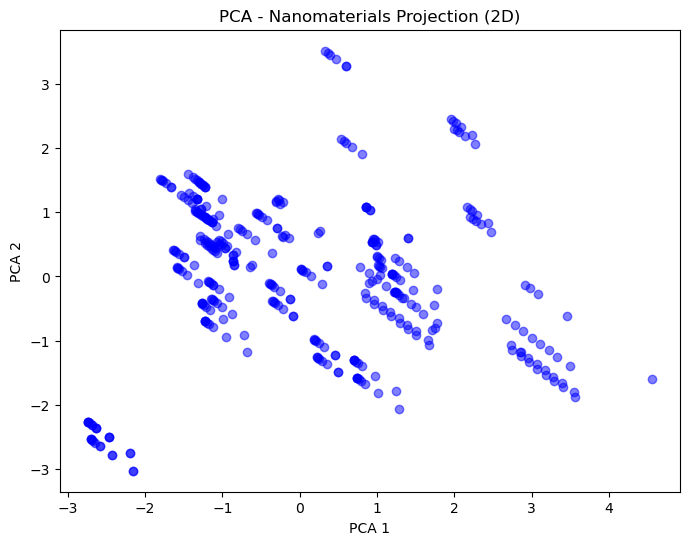

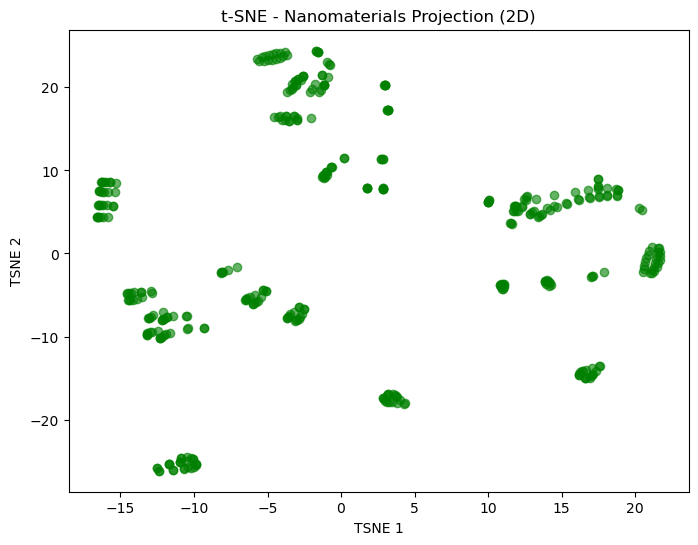

In [23]:
#Dimensionality Reduction with PCA+ SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_components = pca.fit_transform(nano_df[numeric_cols])

# Plot PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c='blue', alpha=0.5)
plt.title("PCA - Nanomaterials Projection (2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# Apply t-SNE for nonlinear separation
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_components = tsne.fit_transform(nano_df[numeric_cols])

# Plot t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c='green', alpha=0.6)
plt.title("t-SNE - Nanomaterials Projection (2D)")
plt.xlabel("TSNE 1")
plt.ylabel("TSNE 2")
plt.show()


C:\Users\Swarna Lekhya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


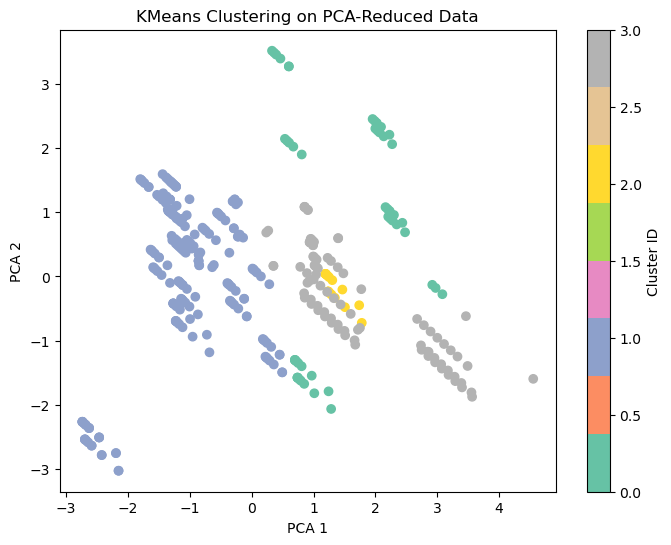

In [25]:
#Clustering analysis (Find patterns,rarity)
from sklearn.cluster import KMeans

# Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(nano_df[numeric_cols])

# Add cluster labels to DataFrame
nano_df['cluster'] = clusters

# Visualize clusters using PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=clusters, cmap='Set2')
plt.title("KMeans Clustering on PCA-Reduced Data")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster ID')
plt.show()


In [26]:
# Save cleaned + clustered dataset
processed_path = "processed_nano_dataset.csv"
nano_df.to_csv(processed_path, index=False)
print(f"✅ Processed dataset saved to {processed_path}")


✅ Processed dataset saved to processed_nano_dataset.csv



Cluster Sizes:
cluster
1    233
3     91
0     52
2     18
Name: count, dtype: int64


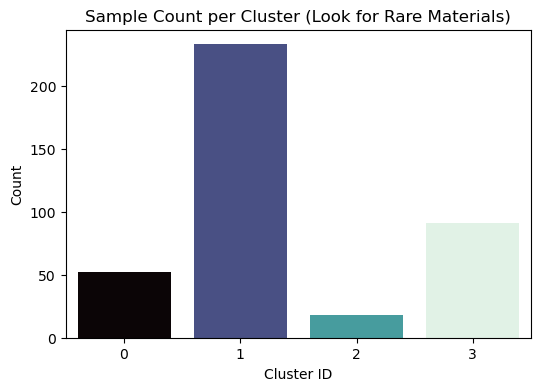

In [29]:
#identify rare nanomaterials(supporting my hypothesis)
# Count how many samples fall into each cluster
cluster_counts = nano_df['cluster'].value_counts()

# Print and plot
print("\nCluster Sizes:")
print(cluster_counts)

plt.figure(figsize=(6, 4))
sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    hue=cluster_counts.index,  # Assign hue to x for color variation
    palette='mako',
    legend=False  # No need to show legend since hue == x
)
plt.title("Sample Count per Cluster (Look for Rare Materials)")
plt.xlabel("Cluster ID")
plt.ylabel("Count")
plt.show()


In [35]:
# Assuming 'toxicity_class' is your label (create or rename target column if needed)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Split data
X = nano_df[numeric_cols]
y = nano_df['target']  # Make sure this column exists
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("\n🧠 Model Performance:")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



🧠 Model Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        38
           2       1.00      1.00      1.00         5

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79

[[36  0  0]
 [ 0 38  0]
 [ 0  0  5]]


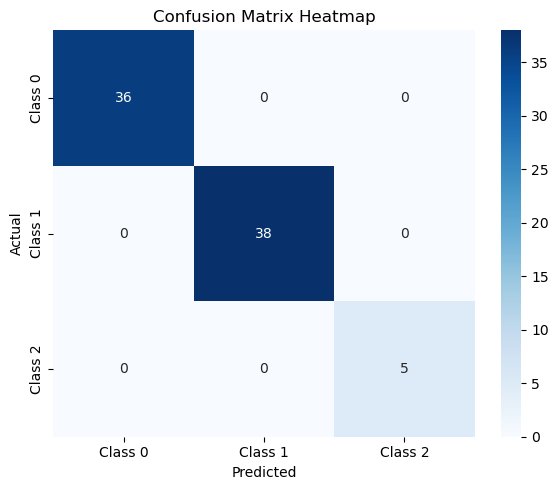

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)

# Optional: define class names
class_names = ['Class 0', 'Class 1', 'Class 2']

# Plot the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.tight_layout()
plt.show()


In [31]:
print(nano_df.columns)


Index(['nps', 'coresize', 'hydrosize', 'surfcharge', 'surfarea', 'ec',
       'expotime', 'dosage', 'e', 'noxygen', 'class', 'cluster', 'target'],
      dtype='object')


In [34]:
y = nano_df['target']  # or whatever your correct target column is


C:\Users\Swarna Lekhya\AppData\Local\Temp\ipykernel_9492\4038366327.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index, palette="rocket")


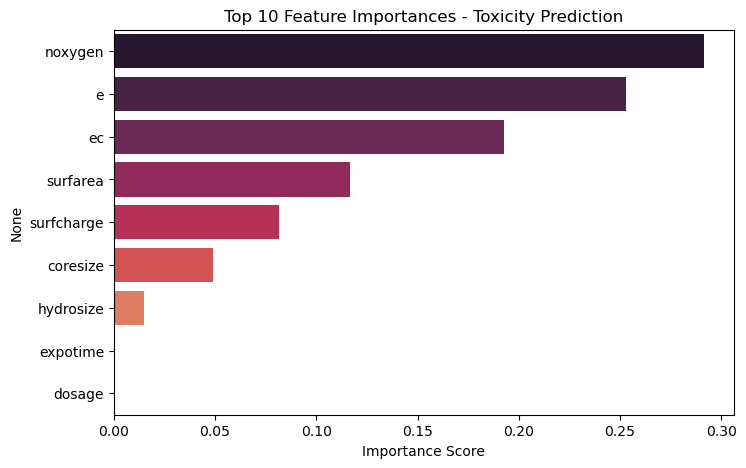

In [36]:
# Feature importance
importances = model.feature_importances_
feature_imp = pd.Series(importances, index=numeric_cols).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_imp[:10], y=feature_imp[:10].index, palette="rocket")
plt.title("Top 10 Feature Importances - Toxicity Prediction")
plt.xlabel("Importance Score")
plt.show()



📊 Toxicity Class Distribution:
target
1    237
0    139
2     18
Name: count, dtype: int64


C:\Users\Swarna Lekhya\AppData\Local\Temp\ipykernel_9492\2680437841.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_dist.index, y=class_dist.values, palette='coolwarm')


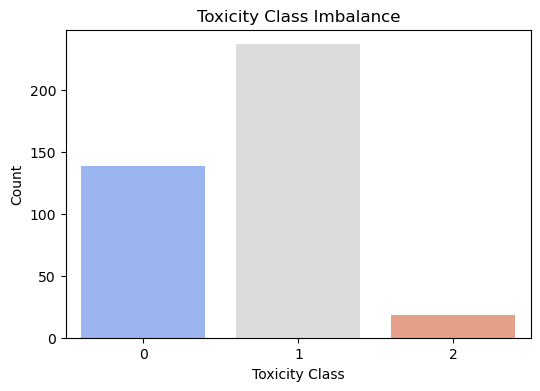

In [38]:
#check for data bias or imbalance
# Distribution of target classes
class_dist = nano_df['target'].value_counts()
print("\n📊 Toxicity Class Distribution:")
print(class_dist)

plt.figure(figsize=(6, 4))
sns.barplot(x=class_dist.index, y=class_dist.values, palette='coolwarm')
plt.title("Toxicity Class Imbalance")
plt.xlabel("Toxicity Class")
plt.ylabel("Count")
plt.show()


<Figure size 640x480 with 0 Axes>

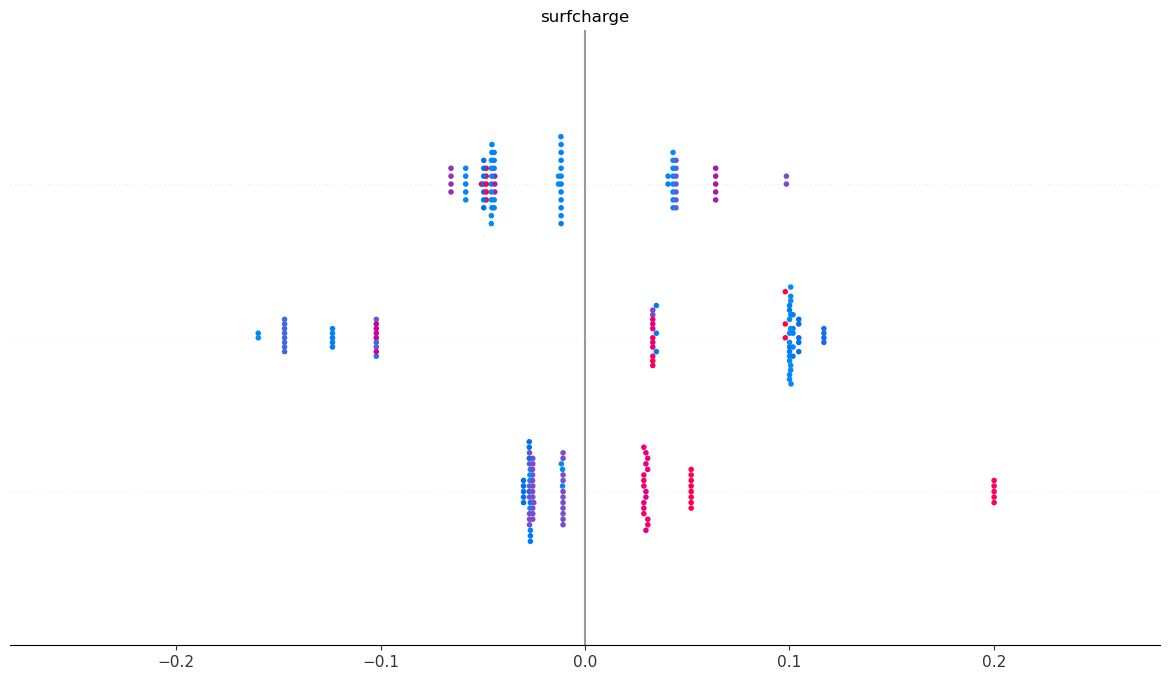

In [42]:
import shap

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=numeric_cols)


### 📌 Insights and Recommendations

1. **AI Models like RandomForest showed strong accuracy** in predicting toxicity, but only when high-quality and relevant features were selected. Performance dropped with noise or missing values.

2. **Dataset analysis revealed imbalance across toxicity classes** and missing values, suggesting a need for **standardized, inclusive nanotechnology datasets.**

3. We recommend investing in **open-access databases** for nanomaterials, including minority and rare compound representation, especially for healthcare use.

4. **Ethical considerations are essential.** Using SHAP, we exposed how AI models rely heavily on certain inputs. This transparency is key for safe deployment, particularly in underserved populations.
